In [ ]:
#Terry starter workbook file

In [12]:
#load dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet

In [35]:
# read in all data, set index and view to confirm looks good
# set file path
csiq = Path('data/CSIQ.csv')
dq = Path('data/DQ.csv')
enph = Path('data/ENPH.csv')
fslr = Path('data/FSLR.csv')
jks = Path('data/JKS.csv')
sedg = Path('data/SEDG.csv')
spwr = Path('data/SPWR.csv')

# read in files
csiq_read = pd.read_csv(csiq, index_col = 'Date')
dq_read = pd.read_csv(dq, index_col = 'Date')
enph_read = pd.read_csv(enph, index_col = 'Date')
fslr_read = pd.read_csv(fslr, index_col = 'Date')
jks_read = pd.read_csv(jks, index_col = 'Date')
sedg_read = pd.read_csv(sedg, index_col = 'Date')
spwr_read = pd.read_csv(spwr, index_col = 'Date')

# view files before using
display(csiq_read.head())
display(dq_read.head())
display(enph_read.head())
display(fslr_read.head())
display(jks_read.head())
display(sedg_read.head())
display(spwr_read.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.360001,22.540001,22.040001,22.520000,22.520000,643300
2020-01-03,22.190001,22.440001,21.590000,21.799999,21.799999,809600
2020-01-06,21.309999,22.330000,21.100000,22.320000,22.320000,938000
2020-01-07,22.290001,22.600000,22.219999,22.360001,22.360001,596900
2020-01-08,22.370001,22.709999,22.110001,22.570000,22.570000,709800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,10.240,11.032,10.240,10.996,10.996,1278000
2020-01-03,10.956,11.102,10.810,10.890,10.890,879500
2020-01-06,10.838,10.840,10.502,10.770,10.770,621000
2020-01-07,10.698,10.834,10.560,10.672,10.672,475500
2020-01-08,10.682,10.932,10.682,10.876,10.876,773500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,26.370001,29.350000,26.040001,29.340000,29.340000,7775400
2020-01-03,28.790001,29.730000,28.379999,29.290001,29.290001,4811000
2020-01-06,29.049999,29.660000,27.830000,29.660000,29.660000,4628800
2020-01-07,29.820000,30.200001,28.660000,29.990000,29.990000,5363100
2020-01-08,29.680000,31.500000,29.440001,31.000000,31.000000,5446100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,56.400002,57.259998,55.959999,57.240002,57.240002,1053800
2020-01-03,57.110001,57.660000,56.709999,57.020000,57.020000,943700
2020-01-06,56.009998,56.419998,54.779999,55.830002,55.830002,1535100
2020-01-07,55.759998,57.310001,55.759998,56.669998,56.669998,974200
2020-01-08,56.860001,57.110001,56.160000,56.700001,56.700001,725700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.790001,23.850000,22.590000,23.84,22.810047,1130300
2020-01-03,23.170000,23.650000,22.480000,22.59,21.614050,1319300
2020-01-06,21.969999,22.570000,21.799999,22.49,21.518370,997800
2020-01-07,22.650000,23.000000,22.559999,22.74,21.757568,592700
2020-01-08,22.480000,22.540001,21.959999,22.23,21.269602,856900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,97.000000,101.879997,96.750000,101.809998,101.809998,2154800
2020-01-03,100.839996,103.599998,100.019997,102.379997,102.379997,1016500
2020-01-06,101.370003,101.879997,98.635002,99.629997,99.629997,970800
2020-01-07,100.000000,102.029999,97.699997,101.790001,101.790001,834900
2020-01-08,101.190002,105.680000,101.190002,104.160004,104.160004,1041300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.173543,5.173543,5.029470,5.127701,5.127701,2764786
2020-01-03,5.062213,5.094957,4.813360,4.826457,4.826457,7053366
2020-01-06,4.734774,4.937787,4.643091,4.891945,4.891945,5552325
2020-01-07,4.905043,5.094957,4.833006,5.003274,5.003274,3223344
2020-01-08,4.963982,5.101506,4.885396,5.029470,5.029470,4496252


In [36]:
# set date time format for all input data to ensure consistency
# set date time format
csiq_read['Date'] = pd.to_datetime(csiq_read.index)
dq_read['Date'] = pd.to_datetime(dq_read.index)
enph_read['Date'] = pd.to_datetime(enph_read.index)
fslr_read['Date'] = pd.to_datetime(fslr_read.index)
jks_read['Date'] = pd.to_datetime(jks_read.index)
sedg_read['Date'] = pd.to_datetime(sedg_read.index)
spwr_read['Date'] = pd.to_datetime(spwr_read.index)


# view appropriate format
display(csiq_read.info())
display(dq_read.info())
display(enph_read.info())
display(fslr_read.info())
display(jks_read.info())
display(sedg_read.info())
display(spwr_read.info())




<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 2020-01-02 to 2024-04-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1075 non-null   float64       
 1   High       1075 non-null   float64       
 2   Low        1075 non-null   float64       
 3   Close      1075 non-null   float64       
 4   Adj Close  1075 non-null   float64       
 5   Volume     1075 non-null   int64         
 6   Date       1075 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 2020-01-02 to 2024-04-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1075 non-null   float64       
 1   High       1075 non-null   float64       
 2   Low        1075 non-null   float64       
 3   Close      1075 non-null   float64       
 4   Adj Close  1075 non-null   float64       
 5   Volume     1075 non-null   int64         
 6   Date       1075 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 2020-01-02 to 2024-04-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1075 non-null   float64       
 1   High       1075 non-null   float64       
 2   Low        1075 non-null   float64       
 3   Close      1075 non-null   float64       
 4   Adj Close  1075 non-null   float64       
 5   Volume     1075 non-null   int64         
 6   Date       1075 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 2020-01-02 to 2024-04-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1075 non-null   float64       
 1   High       1075 non-null   float64       
 2   Low        1075 non-null   float64       
 3   Close      1075 non-null   float64       
 4   Adj Close  1075 non-null   float64       
 5   Volume     1075 non-null   int64         
 6   Date       1075 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 2020-01-02 to 2024-04-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1075 non-null   float64       
 1   High       1075 non-null   float64       
 2   Low        1075 non-null   float64       
 3   Close      1075 non-null   float64       
 4   Adj Close  1075 non-null   float64       
 5   Volume     1075 non-null   int64         
 6   Date       1075 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 2020-01-02 to 2024-04-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1075 non-null   float64       
 1   High       1075 non-null   float64       
 2   Low        1075 non-null   float64       
 3   Close      1075 non-null   float64       
 4   Adj Close  1075 non-null   float64       
 5   Volume     1075 non-null   int64         
 6   Date       1075 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1075 entries, 2020-01-02 to 2024-04-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1075 non-null   float64       
 1   High       1075 non-null   float64       
 2   Low        1075 non-null   float64       
 3   Close      1075 non-null   float64       
 4   Adj Close  1075 non-null   float64       
 5   Volume     1075 non-null   int64         
 6   Date       1075 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.2+ KB


None

In [37]:
# rename close columns to stock name for ease of combining common data elements
# rename columns
csiq_data = csiq_read.rename(columns= {'Close': 'CSIQ'})
dq_data = dq_read.rename(columns= {'Close': 'DQ'})
enph_data = enph_read.rename(columns= {'Close': 'ENPH'})
fslr_data = fslr_read.rename(columns= {'Close': 'FSLR'})
jks_data = jks_read.rename(columns= {'Close': 'JKS'})
sedg_data = sedg_read.rename(columns= {'Close': 'SEDG'})
spwr_data = spwr_read.rename(columns= {'Close': 'SPWR'})

# remove excess columns in model data frames
csiq_data = csiq_data[['CSIQ']]
dq_data = dq_data[['DQ']]
enph_data = enph_data[['ENPH']]
fslr_data = fslr_data[['FSLR']]
jks_data = jks_data[['JKS']]
sedg_data = sedg_data[['SEDG']]
spwr_data = spwr_data[['SPWR']]

# view condensed data
display(csiq_data.head())
display(dq_data.head())
display(enph_data.head())
display(fslr_data.head())
display(jks_data.head())
display(sedg_data.head())
display(spwr_data.head())


,CSIQ
Date,
2020-01-02,22.520000
2020-01-03,21.799999
2020-01-06,22.320000
2020-01-07,22.360001
2020-01-08,22.570000


,DQ
Date,
2020-01-02,10.996
2020-01-03,10.890
2020-01-06,10.770
2020-01-07,10.672
2020-01-08,10.876


,ENPH
Date,
2020-01-02,29.340000
2020-01-03,29.290001
2020-01-06,29.660000
2020-01-07,29.990000
2020-01-08,31.000000


,FSLR
Date,
2020-01-02,57.240002
2020-01-03,57.020000
2020-01-06,55.830002
2020-01-07,56.669998
2020-01-08,56.700001


,JKS
Date,
2020-01-02,23.84
2020-01-03,22.59
2020-01-06,22.49
2020-01-07,22.74
2020-01-08,22.23


,SEDG
Date,
2020-01-02,101.809998
2020-01-03,102.379997
2020-01-06,99.629997
2020-01-07,101.790001
2020-01-08,104.160004


,SPWR
Date,
2020-01-02,5.127701
2020-01-03,4.826457
2020-01-06,4.891945
2020-01-07,5.003274
2020-01-08,5.029470


In [38]:
# combine all data into one useable dataframe for all to consume and execute code against
all_data_list = [csiq_data, dq_data, enph_data, fslr_data, jks_data, sedg_data, spwr_data]
combined_data_df = pd.concat(all_data_list, axis=1)
combined_data_df

,CSIQ,DQ,ENPH,FSLR,JKS,SEDG,SPWR
Date,,,,,,,
2020-01-02,22.520000,10.996000,29.340000,57.240002,23.84,101.809998,5.127701
2020-01-03,21.799999,10.890000,29.290001,57.020000,22.59,102.379997,4.826457
2020-01-06,22.320000,10.770000,29.660000,55.830002,22.49,99.629997,4.891945
2020-01-07,22.360001,10.672000,29.990000,56.669998,22.74,101.790001,5.003274
2020-01-08,22.570000,10.876000,31.000000,56.700001,22.23,104.160004,5.029470
...,...,...,...,...,...,...,...
2024-04-04,18.540001,26.700001,120.779999,171.460007,23.83,68.769997,2.850000
2024-04-05,17.150000,27.040001,112.269997,174.600006,23.27,66.690002,2.660000
2024-04-08,17.370001,25.920000,115.239998,179.220001,23.68,66.949997,2.620000


<Axes: xlabel='Date'>

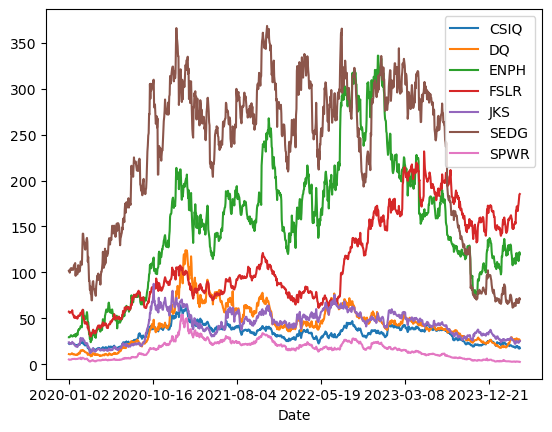

In [39]:
# test plot entire data set to see performance for all
combined_data_df.plot()

<Axes: xlabel='Date'>

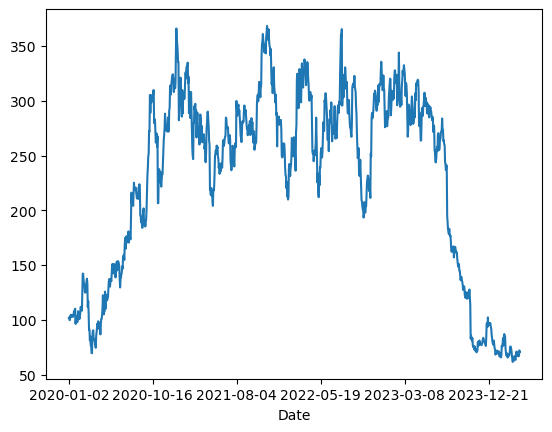

In [44]:
# plot original data element for single stock
sedg_read.head()
sedg_read['Close'].plot()

<Axes: xlabel='Date'>

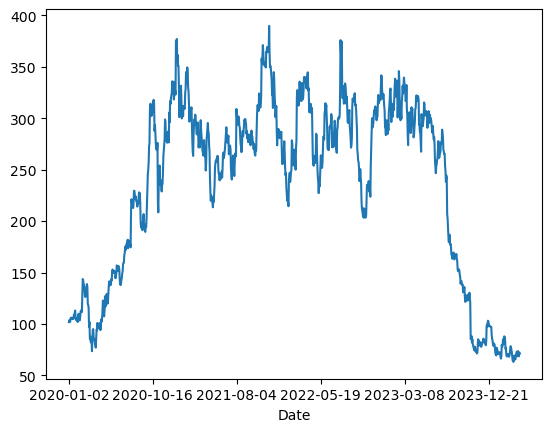

In [45]:
# plot different data from origianl file
sedg_read['High'].plot()

In [ ]:
# create seasonal data based on annual information, daily/weekly highs or lows


In [62]:
# using initial data set to create prediction below 
# csiq_read_new = csiq_read[['Open', 'High', 'Low', 'Close', 'Volume']]
csiq_read_new = csiq_read_new.reset_index()
csiq_read_new.head()

,Date,Open,High,Low,Close,Volume
0,2020-01-02,22.360001,22.540001,22.040001,22.520000,643300
1,2020-01-03,22.190001,22.440001,21.590000,21.799999,809600
2,2020-01-06,21.309999,22.330000,21.100000,22.320000,938000
3,2020-01-07,22.290001,22.600000,22.219999,22.360001,596900
4,2020-01-08,22.370001,22.709999,22.110001,22.570000,709800


11:11:50 - cmdstanpy - INFO - Chain [1] start processing
11:11:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thw42\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thw42\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


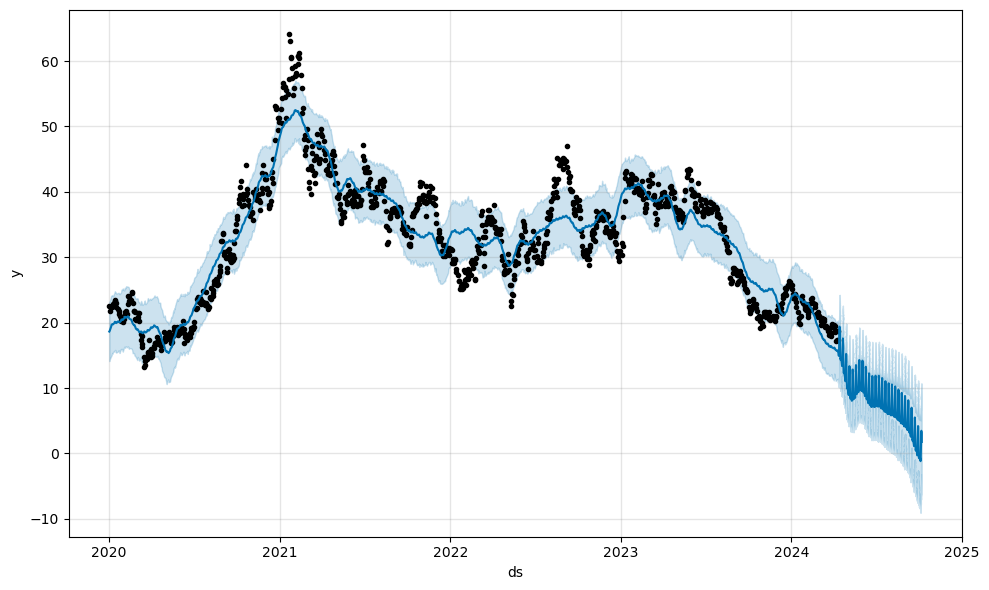

In [65]:
#prediction model
csiq_prophet_df = csiq_read_new[['Date', 'Close']]
csiq_prophet_df = csiq_prophet_df.rename(columns= {'Date': 'ds', 'Close': 'y'})
test_model = Prophet()
test_model.fit(csiq_prophet_df)
future_csiq_trends = test_model.make_future_dataframe(periods = 4300, freq = 'H')
forecast_csiq_trends = test_model.predict(future_csiq_trends)
csiq_predictions_df = test_model.plot(forecast_csiq_trends)

c:\Users\thw42\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thw42\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\thw42\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain

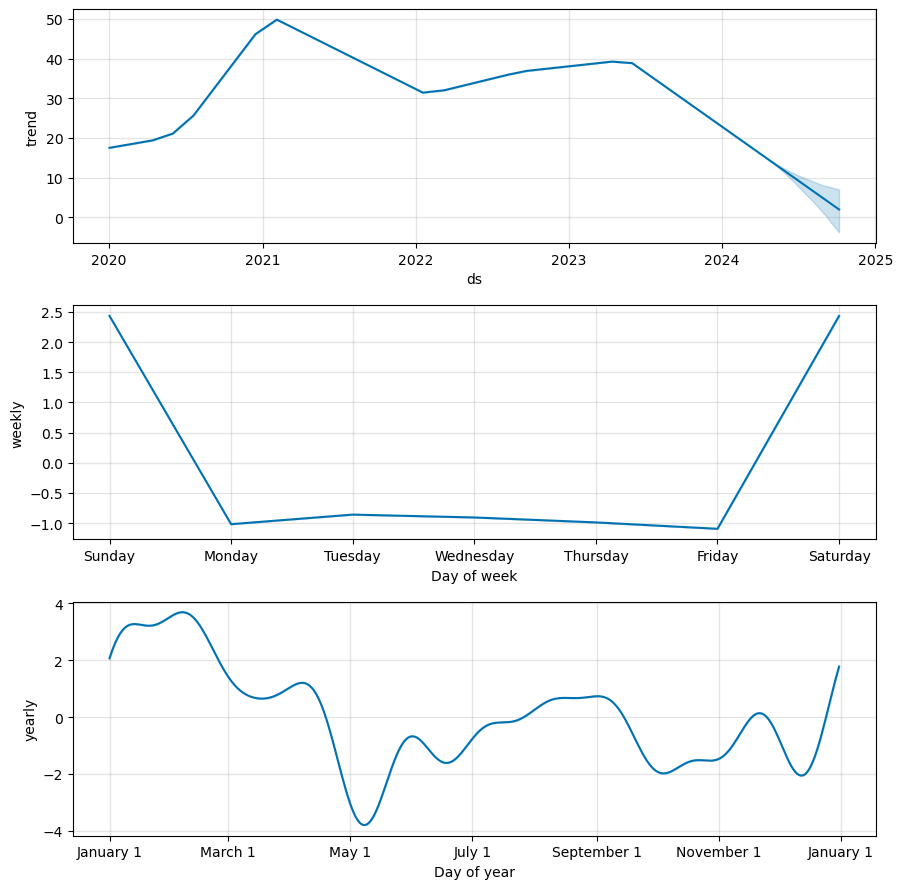

In [66]:
# plot components to show specific information
test_figure = test_model.plot_components(forecast_csiq_trends)